<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/bitcoin_grupred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
import yfinance as yf


In [ ]:
# Download full Bitcoin historical data
data = yf.download('BTC-USD', start='2015-01-01', end='2025-03-31')

# Display first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
# Drop missing values just in case
data.dropna(inplace=True)

# Display dataset shape and summary
print("Shape:", data.shape)
data.describe()


Shape: (3742, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3742.000000,3742.000000,3742.000000,3742.000000,3.742000e+03
mean,21888.672945,22352.186021,21355.871815,21867.971880,1.972139e+10
std,24644.242056,25147.978028,24072.228970,24628.463963,2.082753e+10
min,178.102997,211.731003,171.509995,176.897003,7.860650e+06
25%,2769.067444,2874.439941,2685.257446,2758.934998,1.375345e+09
50%,10078.010254,10277.647461,9727.717285,10072.681641,1.610533e+10
75%,35645.425781,36717.884766,34384.669922,35561.302734,3.081297e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [ ]:
data.tail(100)

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-12-21,97224.726562,99507.101562,96426.523438,97756.195312,51765334294
2024-12-22,95104.937500,97360.265625,94202.187500,97218.320312,43147981314
2024-12-23,94686.242188,96416.210938,92403.132812,95099.390625,65239002919
2024-12-24,98676.093750,99404.062500,93448.015625,94684.343750,47114953674
2024-12-25,99299.195312,99478.750000,97593.468750,98675.914062,33700394629
...,...,...,...,...,...
2025-03-26,86900.882812,88292.156250,85861.453125,87460.234375,26704046038
2025-03-27,87177.101562,87786.726562,85837.937500,86896.257812,24413471941


In [ ]:
# Use all features
feature_cols = ['Open', 'High', 'Low', 'Close',  'Volume']
feature_data = data[feature_cols]

# Normalize the feature data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature_data)


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800


In [ ]:
# Sequence generator
def create_sequences_multi(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i, 3])  # Predicting 'Close' (index 3 in feature list)
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences_multi(scaled_data, seq_length)

print("Input shape:", X.shape)  # (samples, timesteps, features)


Input shape: (3682, 60, 5)


In [ ]:
# 80% training, 20% testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 64)              │          13,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 38,657 (151.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 0.0046
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 1.4326e-04
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 1.2723e-04
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 1.2918e-04
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 2.7837e-04
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 1.1228e-04
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 9.1428e-05
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 1.0364e-04
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 1.0915e-04
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 8.7853e-05
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 7.6739e-05
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 8.9159e-05
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 8.7702e-05
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 1.0101e-04
Epoch 15/20

In [ ]:
# Predict
predictions = model.predict(X_test)

# Inverse scale just the 'Close' value
close_index = feature_cols.index('Close')
scaled_close = scaled_data[:, close_index]
scaled_close = scaled_close.reshape(-1, 1)
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[close_index], scaler.scale_[close_index]

predicted_prices = close_scaler.inverse_transform(predictions)
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure arrays are flattened
y_true = actual_prices.flatten()
y_pred = predicted_prices.flatten()

# ✅ Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

# ✅ Root Mean Squared Error
rmse = np.sqrt(mse)

# ✅ R² Score
r2 = r2_score(y_true, y_pred)

# 🔍 Print the results
print("📉 GRU Model Evaluation Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


📉 GRU Model Evaluation Metrics:
🔹 Mean Squared Error (MSE): 4485927.34
🔹 Root Mean Squared Error (RMSE): 2118.00
🔹 R² Score: 0.9924


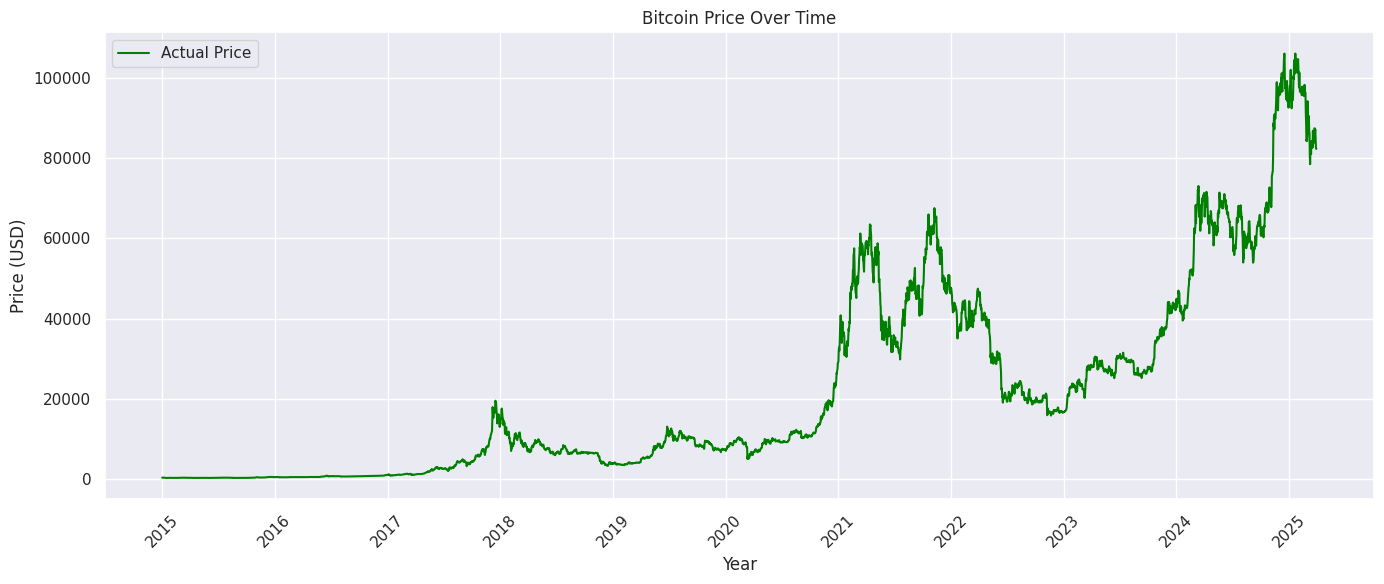

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Actual Price', color='green')

# Format x-axis with dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # Show 1 tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show year only

plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
dates = data.index[-len(actual_prices):]


<ipython-input-69-223cd5bd3a3b>:38: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



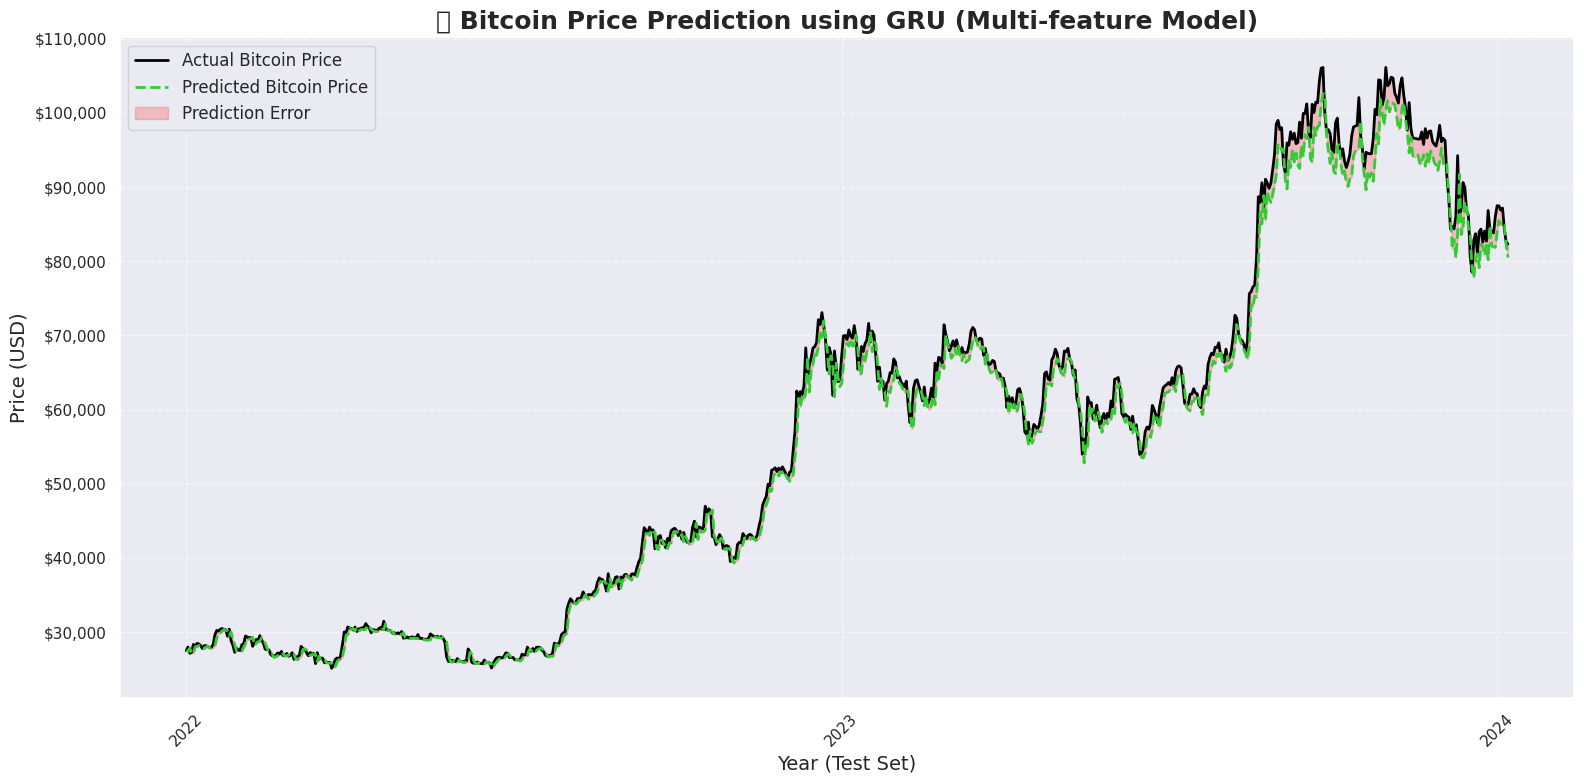

In [ ]:
# Let's say you have 'actual_prices', 'predicted_prices', and 'dates' matching them
# Make sure dates is a pandas Series or array of datetime
# Example: dates = data['Date'][-len(actual_prices):]  # Slice correct portion

plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')

# Plot actual and predicted prices
plt.plot(dates, actual_prices, color='black', label='Actual Bitcoin Price', linewidth=2)
plt.plot(dates, predicted_prices, color='limegreen', linestyle='--', label='Predicted Bitcoin Price', linewidth=2)

# Fill between for error
plt.fill_between(dates,
                 actual_prices.flatten(),
                 predicted_prices.flatten(),
                 color='red',
                 alpha=0.2,
                 label='Prediction Error')

# Title and labels
plt.title('📈 Bitcoin Price Prediction using GRU (Multi-feature Model)', fontsize=18, fontweight='bold')
plt.xlabel('Year (Test Set)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Format y-axis as dollars
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# ✅ Format x-axis with specific years from 2015 to 2025
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.YearLocator())                         # Tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))                 # Format as year
plt.xticks(rotation=45)

# Final touches
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Generate Buy/Sell/Hold signals
suggestions = []

for actual, predicted in zip(actual_prices, predicted_prices):
    if predicted > actual * 1.01:  # If prediction is 1% higher than actual
        suggestions.append("BUY")
    elif predicted < actual * 0.99:  # If prediction is 1% lower
        suggestions.append("SELL")
    else:
        suggestions.append("HOLD")


In [ ]:
# Create a DataFrame with signals
suggestion_df = pd.DataFrame({
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten(),
    'Signal': suggestions
})

# Optionally add index/dates if you have them
suggestion_df.index = data.index[-len(suggestion_df):]  # match with original data's tail

# Show the last 10 suggestions
suggestion_df.tail(10)


,Actual Price,Predicted Price,Signal
Date,,,
2025-03-21,84043.242188,82045.515625,SELL
2025-03-22,83832.484375,81961.687500,SELL
2025-03-23,86054.375000,81878.812500,SELL
2025-03-24,87498.914062,83913.921875,SELL
2025-03-25,87471.703125,85484.515625,SELL
2025-03-26,86900.882812,85031.007812,SELL
2025-03-27,87177.101562,84673.960938,SELL
2025-03-28,84353.148438,84858.382812,HOLD
2025-03-29,82597.585938,82343.515625,HOLD


<ipython-input-76-223cd5bd3a3b>:38: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



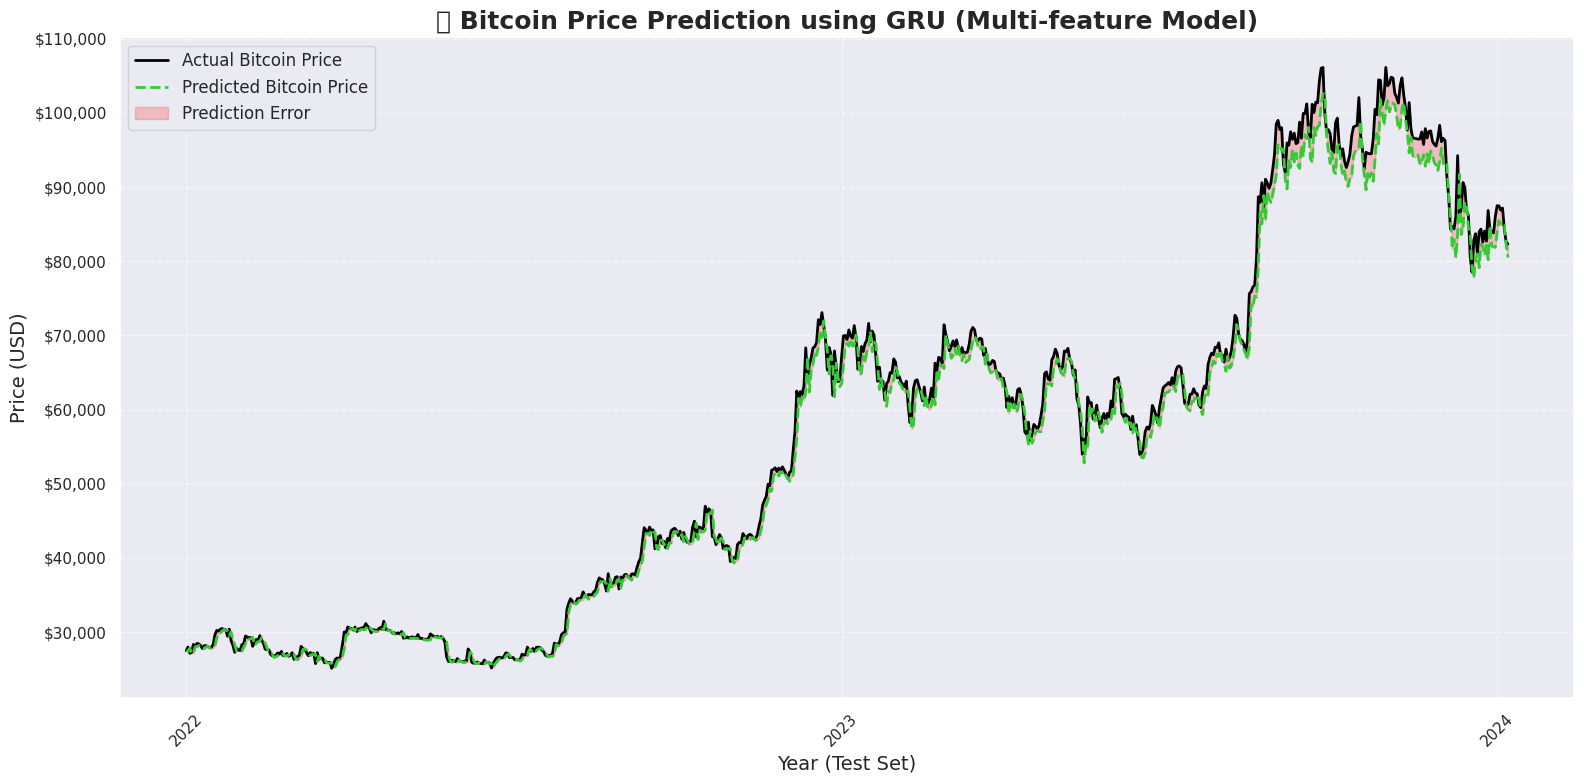

In [ ]:
# Let's say you have 'actual_prices', 'predicted_prices', and 'dates' matching them
# Make sure dates is a pandas Series or array of datetime
# Example: dates = data['Date'][-len(actual_prices):]  # Slice correct portion

plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')

# Plot actual and predicted prices
plt.plot(dates, actual_prices, color='black', label='Actual Bitcoin Price', linewidth=2)
plt.plot(dates, predicted_prices, color='limegreen', linestyle='--', label='Predicted Bitcoin Price', linewidth=2)

# Fill between for error
plt.fill_between(dates,
                 actual_prices.flatten(),
                 predicted_prices.flatten(),
                 color='red',
                 alpha=0.2,
                 label='Prediction Error')

# Title and labels
plt.title('📈 Bitcoin Price Prediction using GRU (Multi-feature Model)', fontsize=18, fontweight='bold')
plt.xlabel('Year (Test Set)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Format y-axis as dollars
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# ✅ Format x-axis with specific years from 2015 to 2025
ax = plt.gca()

ax.xaxis.set_major_locator(mdates.YearLocator())                         # Tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))                 # Format as year
plt.xticks(rotation=45)

# Final touches
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()